# Predicting Video Game Sales Statistics

## Overview

Using a dataset from Kaggle, we will use linear regression techniques from Python libraries for machine learning in order to discover correlations between various attributes.

### Import Libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

### Heatmap of Correlations Between Data Attributes

<AxesSubplot:>

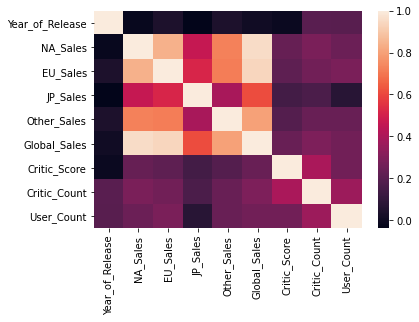

In [27]:
vgsales = pd.read_csv("datasets/video_game_sales.csv")
# Remove rows with NULL values.
vgsales.dropna(inplace=True)
sb.heatmap(vgsales.corr())

Let's explore the connection between a game's success in the North American market to predict how well it will do in the European market.

In [28]:
X = vgsales["NA_Sales"].values
y = vgsales["EU_Sales"].values
X_bar = np.mean(X)
y_bar = np.mean(y)

# Use the Least Squares Method to find equation of regression line.
numer = 0
denom = 0
for i in range(len(X)):
    numer += (X[i] - X_bar) * (y[i]- y_bar)
    denom += (X[i] - X_bar) ** 2
    
b1 = numer / denom
b0 = y_bar - (b1 * X_bar)
print("Slope:", b1)
print("Intercept:", b0)

Slope: 0.5981066325367917
Intercept: 0.00014616965414929184


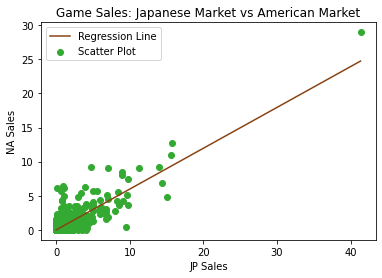

In [29]:
X_plot = np.linspace(np.min(X), np.max(X), len(X))
y_plot = b0 + b1 * X_plot
plt.plot (X_plot, y_plot, c="#894312", label="Regression Line")
plt.scatter(X, y, c="#34aa32", label="Scatter Plot")
plt.title("Game Sales: Japanese Market vs American Market")
plt.xlabel("JP Sales")
plt.ylabel("NA Sales")
plt.legend()
plt.show()

In [30]:
sst = 0
sse = 0
ssr = 0
for i in range(len(X)):
    y_pred = b0 + b1 * X[i]
    sst += (y[i] - y_bar) ** 2
    sse += (y[i] - y_pred) ** 2
    ssr += (y_pred - y_bar) ** 2
print("SST:",sst)
print("SSE:",sse)
print("SSR:",ssr)
print("Coefficient of Determination:",ssr/sst)

SST: 3223.811125479892
SSE: 939.2896917268965
SSR: 2284.521433753208
Coefficient of Determination: 0.7086399745000996


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = X.reshape((len(X),1))
# Setup regression model with X and y
regr_model = LinearRegression()
regr_model = regr_model.fit(X, y)
# Predict for y
y_pred = regr_model.predict(X)
# Figure out mean squared error and its root
mse = mean_squared_error(y, y_pred)
root_mse = np.sqrt(mse)
# Score the model
score = regr_model.score(X, y)
print("Root Mean Squared Error:", root_mse)
print("Score:", score)

Root Mean Squared Error: 0.370978251730057
Score: 0.7086399745000271
